In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import time
import os
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
# from keras.optimizers import Adam

In [3]:
filenames = os.listdir("/content/drive/MyDrive/AutismDataset/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
    else:
        categories.append(str(0))

train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

(565, 388, 3)


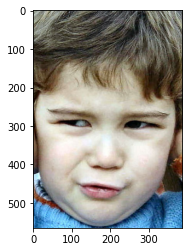

In [4]:
fpath = "/content/drive/MyDrive/AutismDataset/test/Autistic.3.jpg"
img=plt.imread(fpath)
print (img.shape)
plt.imshow(img)

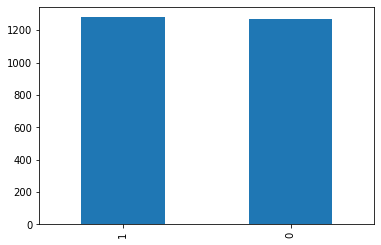

In [5]:
train_df['category'].value_counts().plot.bar()

In [6]:
train_df.head()

,filename,category
0,Non_Autistic.1217.jpg,0
1,Non_Autistic.1030.jpg,0
2,Non_Autistic.180.jpg,0
3,Non_Autistic.119.jpg,0
4,Autistic.914.jpg,1


In [7]:
train_df.tail()

,filename,category
2545,Autistic.202.jpg,1
2546,Autistic.433.jpg,1
2547,Autistic.40.jpg,1
2548,Autistic.290.jpg,1
2549,Autistic.539.jpg,1


In [8]:
test_filenames = os.listdir("/content/drive/MyDrive/AutismDataset/test")
categories = []
for filename in test_filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
    else:
        categories.append(str(0))

test_df = pd.DataFrame({
    'filename': test_filenames,
    'category': categories
})

In [9]:
test_df.head()

,filename,category
0,Autistic.42.jpg,1
1,Autistic.148.jpg,1
2,Autistic.51.jpg,1
3,Autistic.106.jpg,1
4,Autistic.56.jpg,1


In [10]:
test_df.tail()

,filename,category
295,Non_Autistic.53.jpg,0
296,Non_Autistic.73.jpg,0
297,Autistic.91.jpg,1
298,Non_Autistic.47.jpg,0
299,Non_Autistic.144.jpg,0


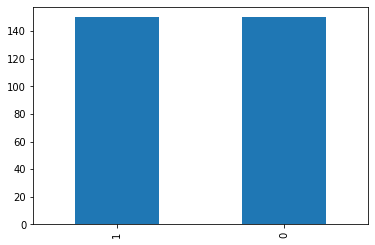

In [11]:
test_df['category'].value_counts().plot.bar()

In [12]:
valid_filenames = os.listdir("/content/drive/MyDrive/AutismDataset/valid")
categories = []
for filename in valid_filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(str(1))
    else:
        categories.append(str(0))

valid_df = pd.DataFrame({
    'filename': valid_filenames,
    'category': categories
})

In [13]:
valid_df.head()

,filename,category
0,Non_Autistic. (9).jpg,0
1,Autistic. (19).jpg,1
2,Autistic. (7).jpg,1
3,Autistic. (38).jpg,1
4,Non_Autistic. (4).jpg,0


In [14]:
valid_df.tail()

,filename,category
95,Non_Autistic. (30).jpg,0
96,Non_Autistic. (37).jpg,0
97,Non_Autistic. (50).jpg,0
98,Non_Autistic. (49).jpg,0
99,Non_Autistic. (33).jpg,0


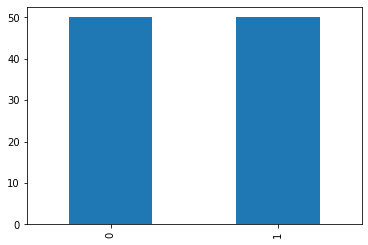

In [15]:
valid_df['category'].value_counts().plot.bar()

In [16]:
image_size = 224
input_shape = (image_size, image_size, 3)
mobile = keras.applications.mobilenet.MobileNet()

In [17]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

model=Model(inputs=base_model.input,outputs=preds)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_2
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

In [19]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [20]:
# Prepare Test and Train Data
train_df, validate_df = train_test_split(train_df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

# validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
# train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [21]:
epochs = 40
batch_size = 64
# Training Generator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest', 
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/drive/MyDrive/AutismDataset/train", 
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2295 validated image filenames belonging to 2 classes.


In [22]:
# Validation Generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/drive/MyDrive/AutismDataset/train", 
    x_col='filename',
    y_col='category',
    class_mode='categorical',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 255 validated image filenames belonging to 2 classes.


In [23]:
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator( train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,steps_per_epoch=step_size_train)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/40
35/35 [==============================] - 54s 1s/step - loss: 0.6720 - accuracy: 0.7311 - val_loss: 3.8803 - val_accuracy: 0.5469
Epoch 2/40
35/35 [==============================] - 46s 1s/step - loss: 0.3583 - accuracy: 0.8359 - val_loss: 2.0890 - val_accuracy: 0.6146
Epoch 3/40
35/35 [==============================] - 46s 1s/step - loss: 0.3050 - accuracy: 0.8687 - val_loss: 0.6084 - val_accuracy: 0.7917
Epoch 4/40
35/35 [==============================] - 46s 1s/step - loss: 0.2987 - accuracy: 0.8754 - val_loss: 1.9816 - val_accuracy: 0.6562
Epoch 5/40
35/35 [==============================] - 45s 1s/step - loss: 0.2649 - accuracy: 0.8938 - val_loss: 0.5066 - val_accuracy: 0.8073
Epoch 6/40
35/35 [==============================] - 45s 1s/step - loss: 0.2240 - accuracy: 0.9041 - val_loss: 1.3004 - val_accuracy: 0.6771
Epoch 7/40
35/35 [==============================] - 45s 1s/step - loss: 0.2299 - accuracy: 0.9099 - val_loss: 1.1125 - val_accuracy: 0.7344
Epoch 8/40
35/35 [==

In [71]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test: accuracy = 0.822917  ;  loss = 1.082349 


In [33]:
model.save('mobile_net_architecture.h5')

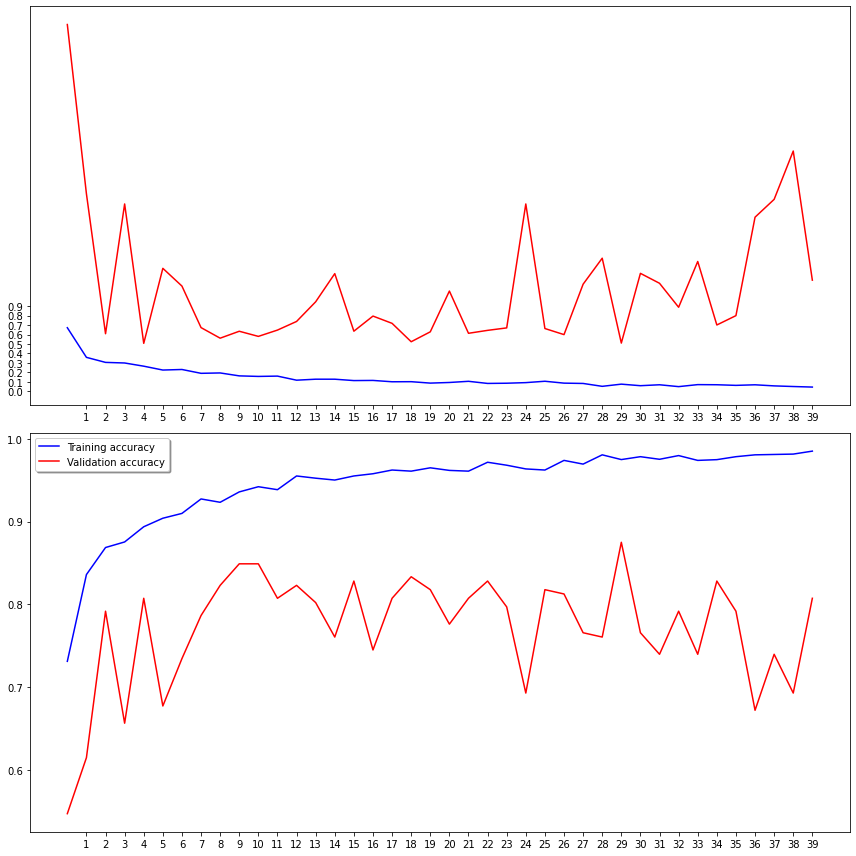

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))


legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [35]:
test_filenames = os.listdir("/content/drive/MyDrive/AutismDataset/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [36]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/drive/MyDrive/AutismDataset/test", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)

Found 300 validated image filenames.


In [37]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
predict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


array([[7.63102507e-05, 9.99923706e-01],
       [2.84203793e-07, 9.99999762e-01],
       [2.11346514e-08, 1.00000000e+00],
       [7.87900547e-07, 9.99999166e-01],
       [6.46682922e-04, 9.99353349e-01],
       [2.40758181e-01, 7.59241819e-01],
       [1.09735311e-06, 9.99998927e-01],
       [2.00659338e-06, 9.99997973e-01],
       [4.87704495e-11, 1.00000000e+00],
       [9.93422072e-05, 9.99900699e-01],
       [1.15586437e-04, 9.99884367e-01],
       [3.14593352e-02, 9.68540668e-01],
       [7.06744045e-02, 9.29325640e-01],
       [1.11741372e-06, 9.99998927e-01],
       [2.26118891e-06, 9.99997735e-01],
       [2.81606191e-07, 9.99999762e-01],
       [1.11931413e-02, 9.88806844e-01],
       [9.99977231e-01, 2.27129512e-05],
       [1.20279765e-04, 9.99879718e-01],
       [2.56601092e-03, 9.97433960e-01],
       [2.53572163e-09, 1.00000000e+00],
       [1.17049971e-07, 9.99999881e-01],
       [5.07135817e-04, 9.99492884e-01],
       [1.60405915e-02, 9.83959377e-01],
       [1.960031

In [46]:
test_filenames2 = os.listdir("/content/drive/MyDrive/Predictions")
test_df2 = pd.DataFrame({
    'filename': test_filenames2
})
nb_samples = test_df2.shape[0]

In [47]:
test_gen2 = ImageDataGenerator(rescale=1./255)
test_generator2 = test_gen2.flow_from_dataframe(
    test_df2, 
    "/content/drive/MyDrive/Predictions", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    shuffle=False
)

Found 21 validated image filenames.


In [48]:
predict2 = model.predict_generator(test_generator2, steps=np.ceil(nb_samples/batch_size))
predict2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


array([[1.0471841e-05, 9.9998951e-01],
       [9.9986434e-01, 1.3560959e-04],
       [1.0000000e+00, 1.3788305e-15],
       [1.0000000e+00, 2.5267189e-08],
       [9.9999952e-01, 4.6389340e-07],
       [5.4337859e-02, 9.4566220e-01],
       [9.9995542e-01, 4.4549903e-05],
       [9.8338610e-01, 1.6613856e-02],
       [5.0665457e-12, 1.0000000e+00],
       [4.2166981e-08, 1.0000000e+00],
       [1.1653657e-03, 9.9883467e-01],
       [2.4662098e-02, 9.7533786e-01],
       [2.5062454e-01, 7.4937546e-01],
       [7.7292435e-07, 9.9999928e-01],
       [2.2672570e-05, 9.9997735e-01],
       [9.6210135e-07, 9.9999905e-01],
       [9.9893242e-01, 1.0675529e-03],
       [9.1057575e-01, 8.9424290e-02],
       [1.0000000e+00, 4.4591050e-10],
       [3.2876190e-02, 9.6712387e-01],
       [1.0000000e+00, 1.2613927e-14]], dtype=float32)

In [49]:
test_df2['category'] = np.argmax(predict2, axis=-1)
test_df2['category']

0     1
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    0
17    0
18    0
19    1
20    0
Name: category, dtype: int64

In [50]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df2['category'] = test_df2['category'].replace(label_map)
test_df2['category']

0     1
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    0
17    0
18    0
19    1
20    0
Name: category, dtype: object